# SVM et Sélection d'attribut



## Variables d'environement

Pensez à vérifier les variables d'environement:

In [1]:
import sys

print(sys.version)
print(sys.path)

3.6.4 (v3.6.4:d48ecebad5, Dec 18 2017, 21:07:28) 
[GCC 4.2.1 (Apple Inc. build 5666) (dot 3)]
['/Library/Frameworks/Python.framework/Versions/3.6/lib/python36.zip', '/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6', '/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/lib-dynload', '', '/Users/ETHIY/Library/Python/3.6/lib/python/site-packages', '/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages', '/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/PyYAML-3.12-py3.6-macosx-10.6-intel.egg', '/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/tqdm-4.23.1-py3.6.egg', '/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pyshp-1.2.12-py3.6.egg', '/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/IPython/extensions', '/Users/ETHIY/.ipython']


## Séparation linéaire

Le but de cette partie est de comparer le SVM linéaire à un autre exemple de classifieur linéaire: le Perceptron. On commence d'abords par rappeler rapidement le principe du Perceptron.

### Perceptron

L'algorithm du Perceptron date des [travaux de Frank Rosenblatt](http://psycnet.apa.org/record/1959-09865-001). Le but était de modéliser l'action des neurones. Ce modèle va être ensuite utilisé pour contruire des réseaux de neurones complexes et c'est la base de toute les méthodes de Deep Learning.

Le modèle donne pour chaque stimulus $i \in \{1,2, \dots,d\}$ de la donnée d'entrée $x = \begin{pmatrix}x_1\\ x_2\\ \vdots \\x_d\end{pmatrix}$ un poids d'importance $w_i$. On combine ses différent stimuli $x$ en pondérant leur somme par le vecteur de poids $w = \begin{pmatrix}w_1\\ w_2\\ \vdots \\w_d\end{pmatrix}$ pour calculer un score $s = \langle w \vert x\rangle = \sum_{i=1,\dots,d}w_i.x_i$. Suite à ce score obtenu, on prends une décision:
* si $s < c \in \mathbb{R}$, on choisit la classe $0$;
* si $s \geq c $, on choisit la classe $1$

On peut écrire donc la fonction de décision du perceptron comme:

$$D_{perceptron}(x) \triangleq 2.\mathbb{1}_{\langle w \vert x \rangle + b \geq 0} - 1 = sign(\langle w \vert x \rangle + b)\quad , \forall x \in \mathbb{R}^d$$

où $b = -c$ et $\mathbb{1}_A(x) = \begin{cases}1 & , x \in A\\0 & , x \notin A\end{cases}\quad , \forall x \in \mathbb{R}^d$.

Le modèle du Perceptron revient donc à choisir un modèle de séparation de donnée linéaire. C'est en réalité une fammille de séparateur possibles. Nous n'avons aucune garantie sur son pouvoir de généralisation.

1. Qu'est ce qui différencie le SVM par rapport au Perceptron en terme de pouvoir de généralisation?

#### Réponse
*SVM cherche à maximiser la marge, ce qui augmente le pouvoir de généralisation

*Perceptron ne maximise pas la marge

### Régression logistique

Le modèle de régression logistique est proche des méthodes génératives. Ce modèle donne une relation entre les probabilités des attributs sachant la classe, comme suit:
$$ \ln \Big( \frac{p(x \vert y=1)}{p(x \vert y=-1)}\Big) = \langle w \vert x \rangle + c \quad , \forall x \in \mathbb{R}^d$$

2.
    a. En appliquant la règle de Bayes, montrer que: 
    $$\frac  {p(y=1\vert x)}{p(y=-1\vert x)} = \frac{p(y=1)}{p(y=-1)} . \frac{p(x \vert y=1)}{p(x \vert y=-1)}\quad , \forall x \in \mathbb{R}^d $$
    b. En déduire la formule suivante:
    $$\ln\Big(\frac  {p(y=1\vert x)}{1-p(y=1\vert x)}\Big) = \ln\Big(\frac{p(y=1)}{p(y=-1)}\Big) + c +\langle w \vert x \rangle \quad , \forall x \in \mathbb{R}^d $$
    c. On rappelle que $\eta(x) = p(y=1\vert x) , \forall x \in \mathbb{R}^d$. Montrer que:
$$\eta(x) = \sigma( b +\langle w \vert x \rangle)\quad , \forall x \in \mathbb{R}^d$$
où: $$\sigma(t) \triangleq \frac{1}{1 + e^{-t}} \quad ,\forall t \in \mathbb{R}$$
    d. Montrer que:
    $$ sign(\sigma(t) - \frac{1}{2}) = sign(t)\quad ,\forall t \in \mathbb{R}$$
    On rappelle que:
    $$\forall x \in \mathbb{R} \quad sign(x) = 2.\mathbb{1}_{x\geq0} - 1 = 2. \begin{cases}1 & , x\geq0 \\ 0 &, x < 0 \end{cases} - 1 = \begin{cases}1 & , x \geq 0 \\ -1 &, x < 0 \end{cases}$$
    $$$$
    $$$$
    On fixe $x \in \mathbb{R}^d$, et on rappelle que, dans le cas binaire, la classe la plus probable $\hat y = \arg \max_y p(y\vert x)$ vérifie: 
    $$ p(\hat y \vert x) \geq \frac{1}{2} $$
    En effet, puisque $y$ prend deux valeurs $1$ et $-1$, on peut écrire:
    $$p(y \vert x) + p(-y \vert x) = 1$$
    donc:
    $$p(y \vert x) \geq \frac{1}{2} \Rightarrow p(-y \vert x) = 1 - p(y \vert x) \leq 1 - \frac{1}{2} = \frac{1}{2} \leq p(y \vert x) \Rightarrow p(y \vert x) \geq \frac{1}{2} $$
    Inversement, par définition:
    $$p(\hat y \vert x) \geq p( -\hat y \vert x) = 1 - p(\hat y \vert x) \Rightarrow 2 . p(\hat y \vert x) \geq 1 \Rightarrow  p(\hat y \vert x) \geq \frac{1}{2} $$
    On verifie donc bien que: 
    $$p(y \vert x) \geq \frac{1}{2} \Leftrightarrow y = \hat y = \arg \max_y p(y \vert x)$$
    e. En déduire que la fonction de décision de Bayes pour le modèle logistique vérifie:
    $$ D_{logistic} = sign(\sigma( b +\langle w \vert \cdot \rangle) - \frac{1}{2}) = sign(b +\langle w \vert \cdot
    \rangle) = D_{perceptron}$$    
    f. Qu'est ce que vérifie le séparateur dans un modèle logistique?

3.
    Ecrire un code python qui trace les deux fonctions, avec de multiple valeurs de $\lambda$, $t \mapsto \sigma(\lambda.t)$ et $t \mapsto \mathbb{1}_{t \geq 0}$, dans une même figure. A la lumière de la figure obtenue, discuter les deux fonctions de décisions.

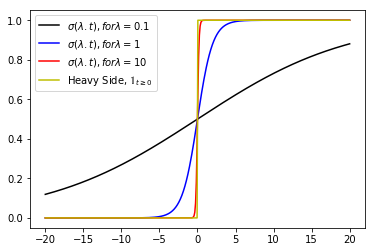

In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

lambdas = [.1, 1, 10]
colors  = ['k','b','r']
x = np.linspace(-20,20,400)
for (l,c) in zip(lambdas, colors):
    plt.plot(x, 1 / (1 + np.exp(-l * x)), color = c, label = '$\sigma(\lambda.t), for  \lambda ={}$'.format(l))
    
plt.plot(x, x > 0, 'y-', label = 'Heavy Side, $\mathbb{1}_{t \geq 0}$')

plt.legend()
plt.show()

#### Réponse

2.
    a.
        $$ \left\{
                \begin{array}{ll}
                    p(x|y = 1) = \frac {p(y = 1|x) . p(x)}{p(y = 1)} \\
                    p(x|y = -1) = \frac {p(y = -1|x) . p(x)}{p(y = -1)}
                 \end{array}
            \right.
        $$
     En divisant ces deux équations terme à terme, il résulte que:
     $$
         \frac{p(x|y = 1)}{p(x|y = -1)} = \frac{p(y = 1|x)}{p(y = -1|x)} . \frac{p(y = -1)}{p(y = 1)}\quad , \forall           x \in \mathbb{R}^d
     $$
2.b. On a:
    $$
         \frac{p(x|y = 1)}{p(x|y = -1)} = \frac{p(y = 1|x)}{p(y = -1|x)} . \frac{p(y = -1)}{p(y = 1)}\quad , \forall           x \in \mathbb{R}^d
     $$
     Donc:
     $$
         ln(\frac{p(x|y = 1)}{p(x|y = -1)}) = ln(\frac{p(y = 1|x)}{p(y = -1|x)}) + ln(\frac{p(y = -1)}{p(y = 1)})\quad , \forall           x \in \mathbb{R}^d
     $$
     Sachant que:
         $$ln(\frac{p(y = -1)}{p(y = 1)} = <\omega|x> + c$$
     On a:
         $$
         ln(\frac{p(x|y = 1)}{p(x|y = -1)}) = ln(\frac{p(y = 1|x)}{p(y = -1|x)}) + <\omega|x> + c \quad , \forall           x \in \mathbb{R}^d
     $$
2.c.
    $$
    ln(\frac{\eta(x)}{1 - \eta(x)}) = ln(\frac{p(y = 1|x)}{p(y = -1|x)}) + <\omega|x> + c \quad , \forall           x \in \mathbb{R}^d
    $$
    so:
    $$\eta(x).[1 + \frac{p(y = 1|x)}{p(y = -1|x)} . exp(<\omega|x> + c)] = \frac{p(y = 1|x)}{p(y = -1|x)}) . exp(<\omega|x> + c)
    $$
    en posant:
        $$ b = exp(ln(\frac{p(y = 1|x)}{p(y = -1|x)}) + c) $$
    on a:
        $$\eta(x).[1 + exp(<\omega|x> + b)] = exp(<\omega|x> + b)
        $$
    donc:
        $$
            \eta(x)= \frac{exp(<\omega|x> + b)}{1 + exp(<\omega|x> + b)}
        $$
   donc:
       $$\eta(x) = \sigma( b +\langle w \vert x \rangle)\quad , \forall x \in \mathbb{R}^d$$
2.d.
    $$sign(\sigma(t) - \frac{1}{2}) = sign(\frac{1}{1 + e^{-t}} - \frac{1}{2}) = sign(\frac{1 - e^{-t}}{2 . (1 + e^{-t})}) = sign(1 - e^{-t}) = sign(t)$$
   
3.$\quad \sigma(\lambda.t)$ converge vers la fonction Heavy side quand $\lambda$ tend vers l'infini


### Comparaison

Le but du code, ci-dessous, est d'illustrer la différence entre le SVM, le Perceptron et la régression logistique.

4.
   a. Qu'est ce que fait ce bout de code?

   b. Commentez le résultat du programme suivant.

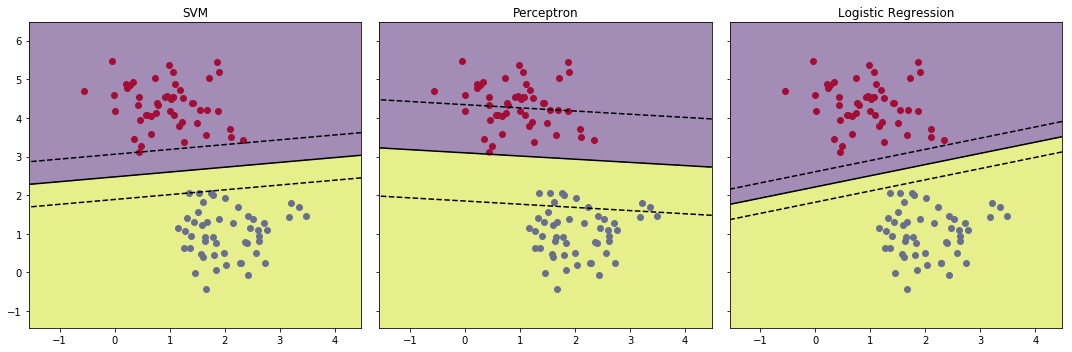

In [3]:
import sklearn.datasets
import sklearn.linear_model


def plot_points(points, ax, color):
    ax.scatter(points[:, 0], points[:, 1], c=color)
    

def plot_dataset(X, Y, ax, colors=['r', 'b']):
    for x, col in zip([X[Y==0], X[Y==1]], colors):
        plot_points(x, ax, col)
        

def mesh_from(instances, gap=.2):
    return np.meshgrid(
        np.arange(X[:, 0].min() - 1, X[:, 0].max() + 1, gap),
        np.arange(X[:, 1].min() - 1, X[:, 1].max() + 1, gap),
    )


def plot_separator(xx, yy, ax, classifier, **parameters):
    """
        Plots separator.
        
        xx: mesh first coordinates
        yy: mesh second coordinates
        ax: subplot to draw in
        classifier: the trained classifier
    """
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, **parameters)


def plot_margin(xx, yy, ax, classifier, **parameters):
    """
        Plots margins.
        
        xx: mesh first coordinates
        yy: mesh second coordinates
        ax: subplot to draw in
        classifier: the trained classifier
    """
    Z = np.empty(xx.shape)
    for (i, j), value in np.ndenumerate(xx):
        Z[i, j] = classifier.decision_function([[value, yy[i, j]]])[0]
    ax.contour(xx, yy, Z, [-1.0, 0.0, 1.0], colors='k', linestyles=['dashed', 'solid', 'dashed'])

X, Y = sklearn.datasets.make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=0.60)
xx, yy = mesh_from(X, .01)

f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True)
f.set_figheight(5)
f.set_figwidth(15)

for ax, loss , title in zip([ax1, ax2, ax3], ['hinge', 'perceptron', 'log'], ['SVM', 'Perceptron', 'Logistic Regression']):
    plot_dataset(X, Y, ax)
    model = sklearn.linear_model.SGDClassifier(alpha=0.01, max_iter=100, loss=loss).fit(X, Y)
    plot_separator(
        xx,
        yy,
        ax,
        model,
        cmap=plt.cm.viridis,
        alpha=0.5
    )
    plot_margin(
        xx,
        yy,
        ax,
        model
    )
    ax.set_title(title)

plt.tight_layout()
plt.show()

#### Réponse:

*Perceptron: trop d'observations de la classe rouge rentrent à l'intérieur de la marge, donc ne sont pas sures, donc on n'apprend pas trop de la donnée, donc sous-apprentissage.

*Logistic regression: marge étroite, donc pouvoir de généralisation réduit, donc overfitting.

*SVM: marge plus étroite que celle du Percetron, et moins étroite que celle de Logistic regression, donc bon apprentissage

<span style="color:green">Very Good</span>

### Pénalisation vs Généralisation

5.
   a. Entraîner des SVM linéaire avec différentes constantes de pénalisation $C$ sur les mêmes données.

   b. Tracer la marge selon les valeurs de la constante $C$.
   
   c. Commenter les résultats.

Computing for C=0.01
Computing for C=0.1
Computing for C=0.5
Computing for C=1
Computing for C=10
Computing for C=100
Computing for C=1000


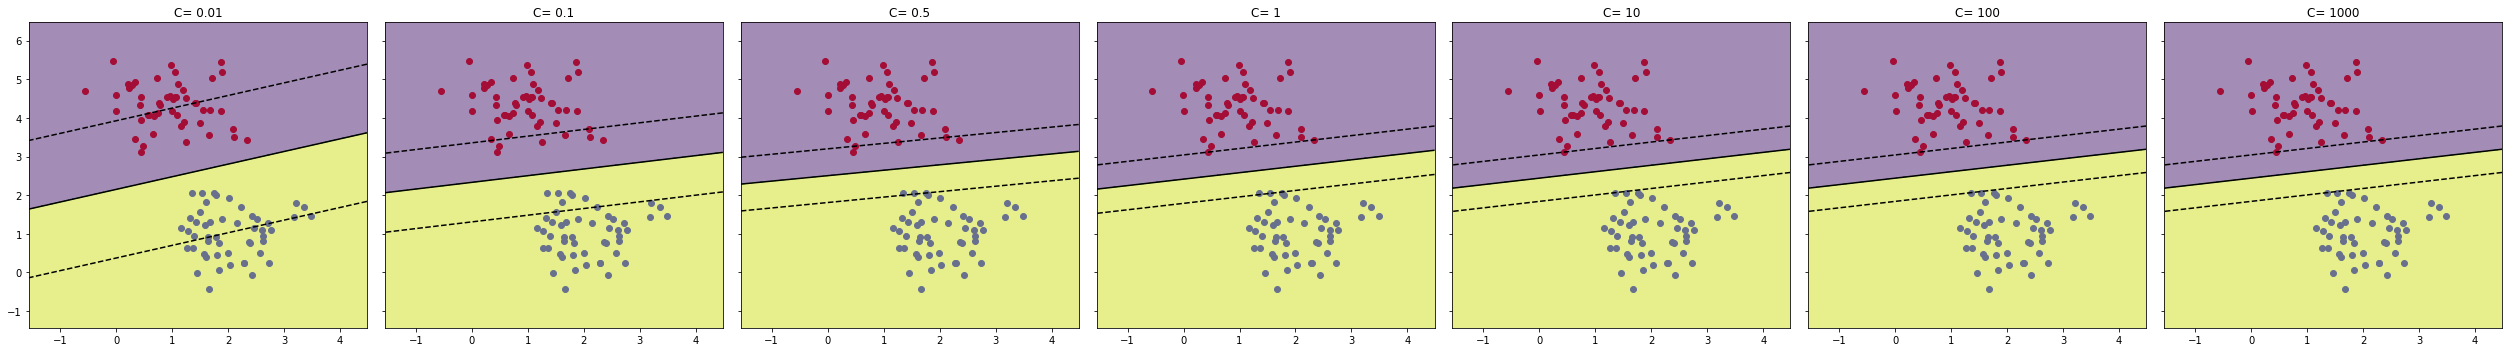

In [4]:
import sklearn.svm

Cs = [.01, .1, .5, 1, 10, 100, 1000]

f, axes = plt.subplots(1, len(Cs), sharey=True)
f.set_figheight(5)
f.set_figwidth(5 * len(Cs))

for C, ax in zip(Cs, list(axes)):
    print('Computing for C=' + str(C))
    plot_dataset(X, Y, ax)
    classifier = sklearn.svm.SVC(C, kernel = 'linear').fit(X, Y)
    plot_separator(
        xx,
        yy,
        ax,
        classifier,
        cmap = plt.cm.viridis,
        alpha = 0.5
    )
    plot_margin(
        xx,
        yy,
        ax,
        classifier
    )
    ax.set_title('C= ' + str(C))
    
plt.tight_layout()
plt.show()

#### Réponse:

Si la constante C s'agrandit -> la marge se rétrécit(à partir de C=1)
donc pour c>=1 on ~~a du sur~~ <span style="color:orange">risque le sur-</span>apprentissage, donc pouvoir de généralisation réduit
Sous apprentissage pour C = .01(car trop de données sont à l'intérieur de la marge), le problème persiste un peu pou C = .1

Je garde C = 0.5. Dans ce cas, on apprend bien de la donnée et la marge est assez large pour avoir un bon pouvoir de généralisation


### Kernel SVM

6.
   a. Entraîner le SVM, en choisissant la meilleur valeur pour $C$, avec le kernel polynomial et le kernel rbf en jouant sur le $\gamma$ sur les données suivantes.

   b. Commenter les résultats.
   

computing for poly kernel, gamma= 1
computing for poly kernel, gamma= 2
computing for poly kernel, gamma= 3
computing for poly kernel, gamma= 4
computing for poly kernel, gamma= 5
computing for poly kernel, gamma= 6
computing for rbf kernel, gamma= 0.01
computing for rbf kernel, gamma= 0.1
computing for rbf kernel, gamma= 2
computing for rbf kernel, gamma= 10
computing for rbf kernel, gamma= 100
computing for rbf kernel, gamma= 1000


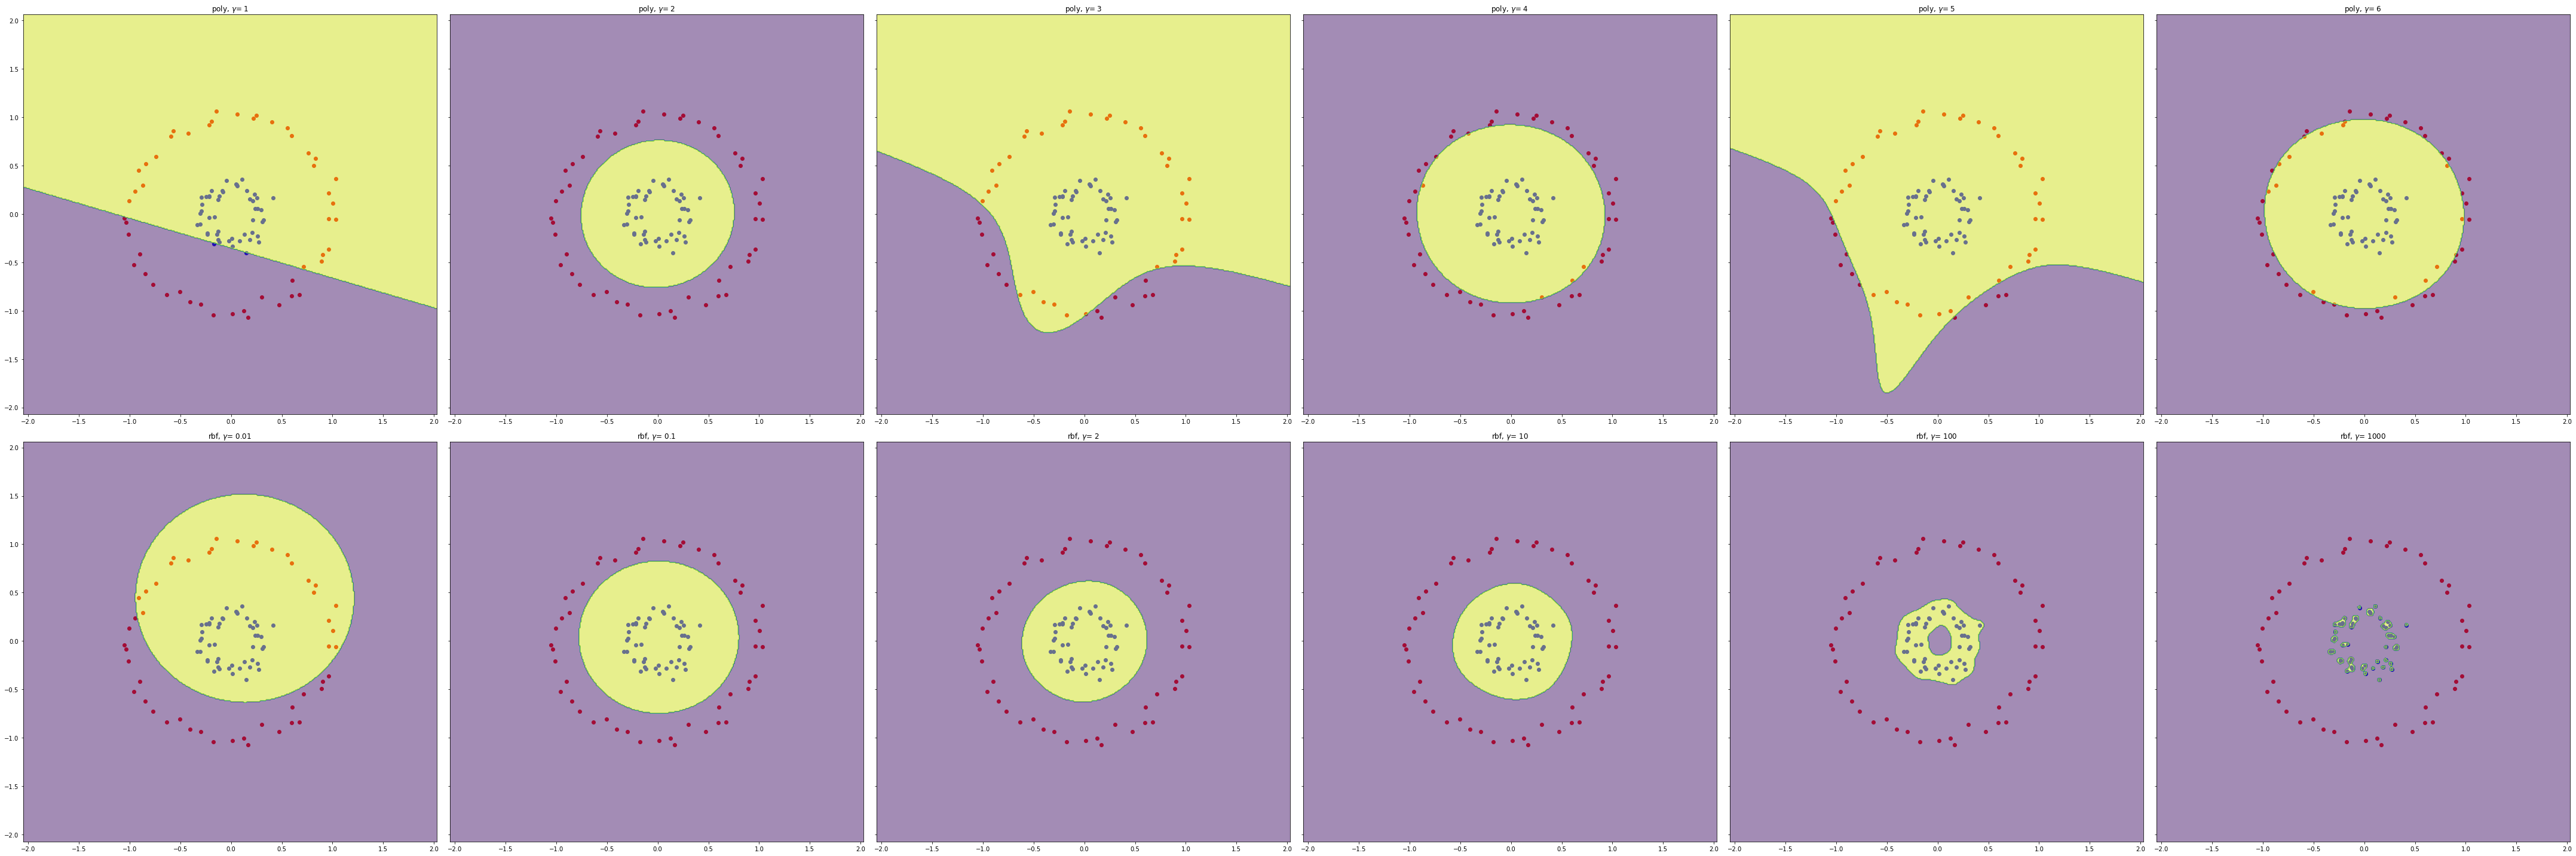

In [5]:
X, Y = sklearn.datasets.make_circles(n_samples=100, factor=.3, noise=.05)
xx, yy = mesh_from(X, .01)

C = .5
gammas = [1, 2, 3, 4, 5, 6]
f, axes = plt.subplots(2, len(gammas), sharey=True)
f.set_figheight(20)
f.set_figwidth(10*len(gammas))

for gamma, ax in zip(gammas, list(axes[0, :])):
    print('computing for poly kernel, gamma= ' + str(gamma))
    plot_dataset(X, Y, ax)
    classifier = sklearn.svm.SVC(C=C, kernel='poly', degree=gamma).fit(X, Y)
    plot_separator(
        xx,
        yy,
        ax,
        classifier,
        cmap = plt.cm.viridis,
        alpha = 0.5
    )
    ax.set_title('poly, $\gamma$= ' + str(gamma))


gammas = [.01, .1, 2, 10, 100, 1000]
for gamma, ax in zip(gammas, list(axes[1, :])):
    print('computing for rbf kernel, gamma= ' + str(gamma))
    plot_dataset(X, Y, ax)
    classifier = sklearn.svm.SVC(C=C, kernel='rbf', gamma=gamma).fit(X, Y)
    plot_separator(
        xx,
        yy,
        ax,
        classifier,
        cmap = plt.cm.viridis,
        alpha = 0.5
    )
    ax.set_title('rbf, $\gamma$= ' + str(gamma))
    

plt.tight_layout()
plt.show()

#### Réponse:

1. Kernel polynômial:
    *degrés impairs: 
        *kernel pas symétrique, donc ne correspond à notre problème qui est symétrique
    
    *degrés pairs:
        *kernel symétrique, donc correspond à la nature du problème, et sépare bien les deux classes.
        *pour degré = 4 et degré = 6, les points de la classe rouge sont trop proches du séparateur, ce qui peut          impliquer des erreurs de classification.
        *je retiens donc degré = 2
        
2. kernel rbf:
    *les meilleures séparations sont pour gamma = 2 et gamma = 10.
    *gamma = 10 donne l'avantage à la classe rouge plus qu'à la classe bleue, donc je garde gamma =2

<span style="color:red"> Tu es très catégorique: par expérience tu ne prouve que les mauvais choix: tu cherches le moins pire</span>.

## Validation croisée

### Train-Test split

Afin d'estimer le pouvoir de généralisation d'un classifieur, il faut le tester sur de nouvelles instances. On parle de données d'entraînement et données de tests. En pratique, on garde aussi des données de côtés pour la validation après calibrage entre entraînement et tests.

1. a. En utilisant la fonction [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) fournie par scikit-learn, entraîner un SVM linéaire sur 80% de vos données et tester sur le reste.

   b. Répéter l'experience plusieurs fois. Commenter les résultats

X_test

[[ 2.03174435  1.13905591]
 [-0.22884442  3.26946266]
 [-0.78341503  7.21921911]
 [ 3.45304008  1.40761114]
 [ 3.02023922 -1.45827145]
 [ 2.90620294  0.56365101]
 [-0.06558171  4.07933552]
 [ 1.59174807 -1.61634205]
 [ 2.47593008 -0.59202176]
 [ 2.26819727  0.41867103]
 [ 0.48738747  2.71438159]
 [ 1.96282792  0.73670575]
 [ 0.63859814  0.28258912]
 [-0.24344934  1.71436342]
 [ 3.10295325  0.90331999]
 [ 0.37150466  6.13745493]
 [ 4.221124    6.30857925]
 [ 2.13395591  5.53904356]
 [-2.85321465  5.28421522]
 [ 2.74443944  4.03390007]
 [-0.49189121  1.47858437]
 [-1.32807882 -0.63609661]
 [ 2.48478305  1.81092941]
 [ 2.68537111  2.4515486 ]
 [ 2.12950999  1.63841882]
 [ 3.09592725  0.6583035 ]
 [ 1.02925117  3.38698985]
 [ 2.92304977  1.42214535]
 [ 3.05484214  0.20658398]
 [ 0.32353975  7.07768292]
 [-1.46902744  4.99796071]
 [ 2.83686484  0.03398171]
 [ 0.21006237  2.53283905]
 [ 3.23475946  0.19803501]
 [ 1.07682712  0.11587969]
 [-1.44457669  3.98467691]
 [ 3.77760706  2.837

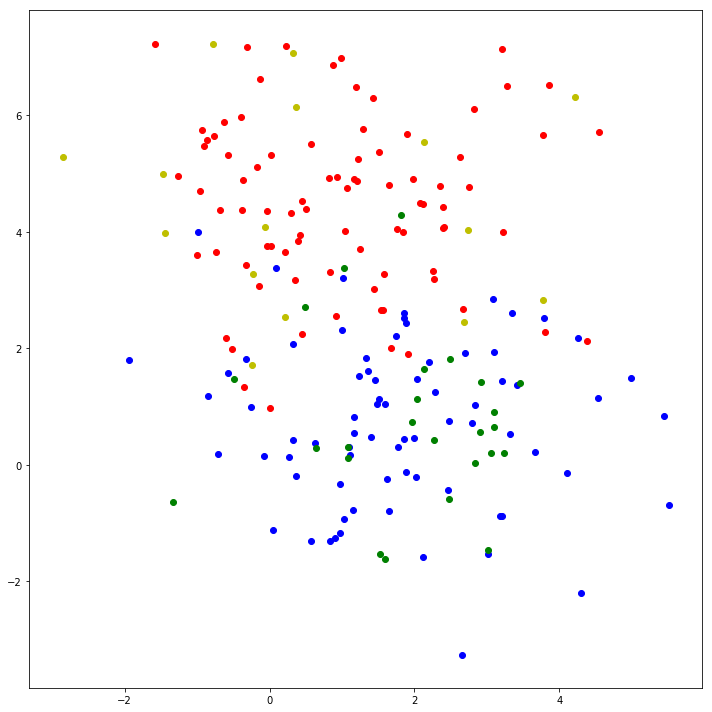

In [13]:
import sklearn.model_selection

C = .5
X, Y = sklearn.datasets.make_blobs(n_samples=200, centers=2, random_state=0, cluster_std=1.5)

# Répartir les données en 4/5 de train data et 1/5 de test data
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split( X, Y, test_size=.2, random_state=42)
print('X_test\n')
print(X_test)
print('Y_test\n')
print(Y_test)
print('X test size: ' + str(len(X_test)))
print('Y test size: ' + str(len(Y_test)))
# Entraîner le modèle
model = sklearn.svm.SVC(C, kernel = 'linear').fit(X_train, Y_train)

# Tester le modèle entraîné
test_score = model.score(X_test, Y_test)

print('Test score :', test_score)

f, ax = plt.subplots(1, 1)
f.set_figheight(10)
f.set_figwidth(10)

plot_dataset(X_train, Y_train, ax, ['r', 'b'])
plot_dataset(X_test, Y_test, ax, ['y', 'g'])
xx, yy = mesh_from(X, .01)

plt.tight_layout()
plt.show()

Commentaire:

<span style="color:red"> My bad il doit changer!</span>.
Même si on entraîne le modèle plusieurs fois, le test score reste le même

### Recherche de paramètres

L'idée de la validation croisée et que l'on varie les données d'entraînement et de test, de façon à ne pas entraîner sur les mauvaises instances et puis tester sur les instances les plus durs.

On subdivise donc toutes les données en $K$ parts égales. A l'instant $k = 1,\dots,K$, on isole la $k^{ième}$ part comme ensemble de test et on entraîne notre modèle sur les $K -1$ parties restantes. On obtient donc, $K$ score de test. Dans le meilleur des cas, on tombe sur les instances qui donnent le plus de pouvoir de généralisation possible.

Pour le SVM, avec juste les vecteurs supports, ce qui reprèsente moins de $10\%$ de la donnée dans notre cas, on obtient le meilleur séparateur linéaire. En cas pratique, au moment de la validation, on ne connaît pas les instances à prédire. On n'est pas sûr donc de tomber sur les vecteurs supports du meilleur modèle qui résoud le problème. On cherche donc, grâce à la validation croisée, les points les plus proches de la marge; pour avoir ainsi, le meilleur pouvoir de généralisation.

La généralisation passe aussi par le bon choix des paramètres du modèle. On utilise donc cette approche dans le but de trouver expérimentalement les meilleurs paramètres. Aussi, répète-t-on l'expérience afin d'essayer autant de configurations possibles. Les paramètres qui donnent les meilleurs scores de tests seront choisis au bout de l'étude.

Le *test score* n'est pas la seule métrique possible. On peut chercher à maximiser le *F-score*, comme on peut aussi s'intéresser qu'au score d'une classe donnée:

* Exemple: Vaudrait mieux un faux signal positif au scanner de bagage qu'un faux négatif (i.e. drogue ou explosif détectés comme sûrs ou un test sangui négatif pour un patient malade).


7.
    En utilisant la fonction [cross_validate](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#sklearn.model_selection.cross_validate) de scikit-learn, trouver la bonne valeur de $C$ pour un modèle SVM linéaire.

In [16]:
def cv_metrics(scores):
    return  (
                np.max(scores),
                np.mean(scores),
                np.median(scores),
                np.min(scores)
            )

Cs = [pow(2, p) for p in range(-15, 15)]

# tester avec tout les C dans Cs est stocker les scores
cv_scores = [
    sklearn.model_selection.cross_validate(
        sklearn.svm.SVC(C = C, kernel = 'linear'),
        X,
        Y,
        cv=5
    )
    for C in Cs
]

test_scores = [cv_metrics(scores['test_score']) for scores in cv_scores]
    
# le meilleur C est:
test_score = max(test_scores)
C = Cs[test_scores.index(test_score)]
print('Le meilleur paramètre de pénalisation des variables ressort est :', C, ', avec un test score moyen de :', test_score[1])

print('Ce modèle donne au moment de l\'entraînement, un score moyen de :', np.mean(cv_scores[test_scores.index(test_score)]['train_score']))

Le meilleur paramètre de pénalisation des variables ressort est : 0.015625 , avec un test score moyen de : 0.9100000000000001
Ce modèle donne au moment de l'entraînement, un score moyen de : 0.9012499999999999


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


#### Commentaire:

<span style="color:red"> Where is it ?</span>.


### SVM vs Random Forest

8.
   a. Comparer le meilleur kernel SVM trouver dans la section 'Kernel SVM' avec une forêt aléatoire de votre choix. 

   b. Tracer les courbes de séparation.

   c. Justifier votre choix de nombre d'arbres et de profondeur.

9.
    Commenter les résultats.

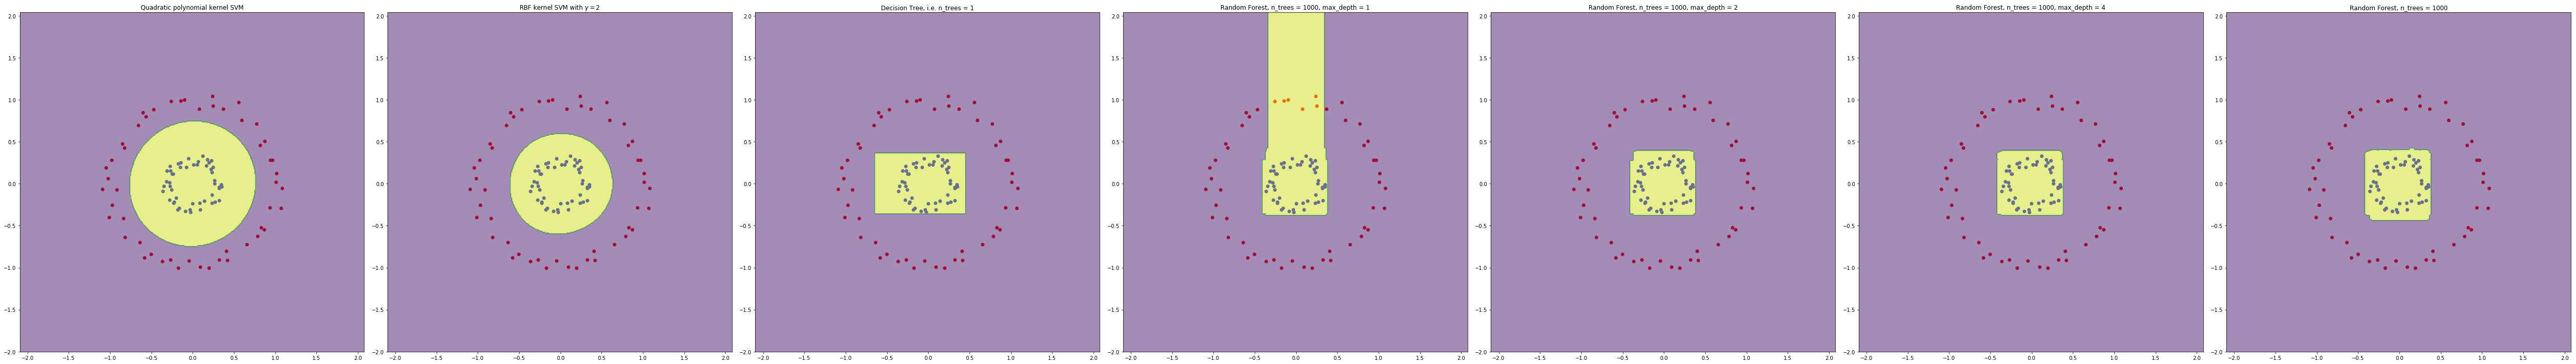

In [17]:
import sklearn.ensemble
import sklearn.tree

X, Y = sklearn.datasets.make_circles(n_samples=100, factor=.3, noise=.05)
xx, yy = mesh_from(X, .01)

models = [
    sklearn.svm.SVC(C = .5, kernel = 'poly', degree = 2),
    sklearn.svm.SVC(kernel = 'rbf', gamma = 2),
    sklearn.ensemble.RandomForestClassifier(n_estimators = 1),
    sklearn.ensemble.RandomForestClassifier(max_depth =1, n_estimators = 1000),
    sklearn.ensemble.RandomForestClassifier(max_depth =2, n_estimators = 1000),
    sklearn.ensemble.RandomForestClassifier(max_depth =4, n_estimators = 1000),
    sklearn.ensemble.RandomForestClassifier(n_estimators = 1000)
]

titles=[
    'Quadratic polynomial kernel SVM',
    'RBF kernel SVM with $\gamma = 2$',
    'Decision Tree, i.e. n_trees = 1',
    'Random Forest, n_trees = 1000, max_depth = 1',
    'Random Forest, n_trees = 1000, max_depth = 2',
    'Random Forest, n_trees = 1000, max_depth = 4',
    'Random Forest, n_trees = 1000'
]

f, axes = plt.subplots(1, len(models))
f.set_figheight(10)
f.set_figwidth(10*len(models))

for model, ax, title in zip(models, axes, titles):
    plot_dataset(X, Y, ax)
    plot_separator(
        xx,
        yy,
        ax,
        model.fit(X,Y),
        cmap=plt.cm.viridis,
        alpha=0.5
    )
    ax.set_title(title)
    

plt.tight_layout()
plt.show()

#### Réponse

*Kenel poly: donne trop l'avantage à la classe bleue: le spérateur s'approche trop des observations de la classe rouge.

*Kernel rbf: bon séparateur, susceptible quand même de donner l'avantage à la classe rouge, parfois.

*Toutes les forêts aléatoires: séparateur sous forme rectangulaire, n'est pas trop compatible avec le problème.


    *forêt aléatoire avec 1 arbre de décision: si on ajoute un nouveau point de la classe bleue juste en dessus de la côte horizontale du séparateur, il sera considéré comme appartenant àla classe rouge, ce qui est faux.
    
    *ax_depth =1, n_estimators = 1000: le séparateur considère trop de points de la classe rouge comme points de la classe bleue. Donc, c'est un séparateur à ne surtout pas utiliser.
    
    *Pour les 3 dernières forêts aléatoires, le pouvoir de généralisation pour la classe bleue est trop réduit puisque le séparateur s'approche trop des points bleus . Donc modèle overfitté.
    
Conclusion:
Modèle à retenir: RBF

<span style="color:red"> Plusieurs arbres mieux qu'un seul</span>.

## Sélection d'attribut

### Occupation des sols

L'occupation des sols à pour but de donner pour le type d'usage faits des terres. Naturellement, la manière la moins couteuse pour obtenir, à large échelle et à très grande fréquence, cette information, serait une approche automatique basée sur les images satellitaires.

On cherche à assigner, pour chaque pixel, un des types d'usage possibles, en utilisant la valeur du pixel ou son voisinage. On modèlise donc le problème avec classification supervisée.

#### Présentation de la donnée

Pour ce TP nous utilisons une image du satellite optique [Sentinel-2 du programme européen Copernicus](http://www.esa.int/Our_Activities/Observing_the_Earth/Copernicus/Sentinel-2). Cette image est acquise le 10 juillet 2016 et téléchargée depuis la plateforme [Theia](https://theia.cnes.fr).

10, des 13 bandes spectrales du satellite Sentinel-2, y sont disponibles en niveau de traitement 2A: B2, B3, B4, B5, B6, B7, B8, B8A, B11 et B12. Ces 10 bandes spectrales ont été réchantillonnées en géométrie terrain (Lambert 93) à 10 m de résolution spatiale et assemblées dans le fichier `sentinel-2_sample.tif`.

Les bandes spectrales de *Sentinel 2*:
![Les bandes spectrales de *Sentinel 2*][sentinel_2]

L'image `sentinel-2_sample.tif` concerne une zone de $14$ Km $\times14$ Km dans le département de la Haute-Garonne (31): ville de Saint-Gaudens. Toutes les données se trouvent dans le répértoire `./data`.

On dispose aussi de :
* `RGE-OCS.shp` : un extrait de l’OCS GE (**OC**cupation du **S**ol **G**rande **E**chelle) de l’IGN sur la zone d’étude;
* `RGE-foret.shp` : un extrait de la BD Forêt de l’IGN sur la zone d’étude.

A partir de ces données, on obtient la vérité terrain *raster* à la même échelle pour chaque pixel dans:
* `ground_truth_landcover.tif`: vérité terrain OCS générale.
* `ground_truth_forest.tif`: vérité terrain raster forêt-non forêt.


1. a. Ouvrir le fichier projet `dataset.qgs` avec QGIS. 

   b. Etudier l'histogramme des bandes de l'image hyperspectrale et la vérité terrain.
   
2. a. Charger l'image sur python en se servant de *gdal*.

   b. Ajouter le *NDVI* comme bande supplémentaire à votre donnée.
   
     * Rappel: $$NDVI = \frac{{\text{NIR}}-{\text{Red}}}{{\text{NIR}}+{\text{Red}}}$$
     * Astuce: ajouter un $\epsilon$ pour ne pas diviser sur zéro. $$NDVI = \frac{{\text{NIR}}-{\text{Red}}}{{\text{NIR}}+{\text{Red}}+\epsilon}$$

   c. Séparer les pixels en données d'entraînement et données de validation à un ratio de 4/5.
   
   d. Utiliser la validation croisée pour trouver le meilleur kernel et les meilleurs paramètres de votre SVM.
   
   e. Qualifier les résultats obtenus.

[sentinel_2]: http://www.cesbio.ups-tlse.fr/data_all/images/sentinel1.png

In [ ]:
import gdal
import gdalconst
import itertools

def read(filename, ndtype=np.float64):
    """
        reads all bands of raster images.
        
        :param filename: the path to the raster image
        :type filename: string
        :return: a list containing a numpy matrix for each band
        :rtype: list
    """
    dataset = gdal.Open(filename, gdalconst.GA_ReadOnly)
    return [
        dataset.GetRasterBand(band).ReadAsArray().astype(ndtype)
        for band in range(1, dataset.RasterCount + 1)
    ]


def add_band(image, lhs, rhs, func):
    """
        add a band to an image by applying a function on two of the image bands.
        
        :param image: a list containing the image bands.
        :param lhs: index of the first band to use
        :param rhs: index of the second band to use
        :param func: the function to apply on the two bands
        :type image: list
        :type lhs: int
        :type rhs: int
        :type func: function
        :return: a list containing a numpy matrix for each band
        :rtype: list
    """
    image.append(func(image[lhs], image[rhs]))


def add_ndvi(image, epsilon = 1E-6):
    add_band(image, 2, 3, lambda x, y: (y-x)/(x + y + epsilon))


band_names = ['B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B8A', 'B11' , 'B12']
bands = read('./data/sentinel-2_sample.tif')

add_ndvi(bands)

# Flatten pixels
X = np.array(list(zip(*[band.flatten() for band in bands])))

# Load ground truth
Y = (read('./data/ground_truth_forest.tif', np.int8)[0] > 1).flatten()

X_train, X_validation, Y_train, Y_validation = sklearn.model_selection.train_test_split(X, Y, test_size=.8, random_state=42)

Cs = [pow(10, p) for p in range(-2, 1)]
polynomial_svms = [('Polynomial', gamma, sklearn.svm.SVC(kernel='poly', degree=gamma)) for gamma in  range(1, 3)]
rbf_svms = [('RBF', gamma, sklearn.svm.SVC(kernel='rbf', gamma=gamma)) for gamma in  [pow(10, p) for p in range(-2, 1)]]


cv_scores = [
    (C, kernel_type, gamma, model, sklearn.model_selection.cross_validate(model, X_train, Y_train, scoring='accuracy', cv=5, n_jobs=-1))
    for (C, (kernel_type, gamma, model)) in list(itertools.product(Cs, polynomial_svms + rbf_svms))[:1]
]

test_scores = [(C, kernel_type, gamma, model, cv_metrics(scores['test_score'])) for (C, kernel_type, gamma, model, scores) in cv_scores]

C, kernel_type, gamma, max_model, max_score = max(test_scores, lambda x: x[4])

print('La meilleur combinaison correspond à: C =', C, 'avec un kernel', kernel_type, 'et \gamma = ', gamma, 'qui donne un test score de:', max_score, 'et une score de validation:', max_model.score(X_validation, Y_validation))

### Sélections d'attributs:

1. a. Estimer le nombre de toutes combinaisons d'attributs possibles.

   b. En utilisant les méthodes vues au cours (SVM-RFE, SFS , BFS et LR), établir une hiérarchie d'attributs (i.e. des bandes).
2. Comparer les différentes méthodes.
3. Commenter les hiérarchies obtenues.

In [ ]:
import sklearn.feature_selection


def try_add_attribute(selected, idx, X, Y, classifier):
    return sklearn.model_selection.cross_validate(
        classifier,
        X[:, list(selected) + [idx]],
        Y,
        scoring='accuracy',
        cv=5,
        n_jobs=-1
    )['test_score']


def try_remove_attribute(selected, idx, X, Y, classifier):
    trying = set(selected)
    trying.remove(idx)
    return sklearn.model_selection.cross_validate(
        classifier,
        X[:, list(trying)],
        Y,
        scoring='accuracy',
        cv=5,
        n_jobs=-1
    )['test_score']


def add_best_attribute(selected, X, Y, classifier):
    max_idx, _ = max(
        [
            (
                idx,
                cv_metrics(
                    try_attribute(selected, idx, X, Y, classifier)
                )
            )
            for idx in (set(range(X.shape[1])) - selected)
        ],
        lambda x: x[1]
    )
    selected.add(max_idx)
    return selected


def remove_best_attribute(selected, X, Y, classifier):
    max_idx, _ = max(
        [
            (
                idx,
                cv_metrics(
                    try_attribute(selected, idx, X, Y, classifier)
                )
            )
            for idx in selected
        ],
        lambda x: x[1]
    )
    selected.remove(max_idx)
    return selected


def add_best_L_attributes(selected, L, X, Y, classifier):
    if L + len(selected) >= X.shape[1]:
        return set(range(X.shape[1]))
    else:
        for i in range(L):
            selected = add_best_attribute(selected, X, Y, classifier)
        return selected


def remove_worst_R_attributes(selected, R, X, Y, classifier):
    if len(selected) - R <= 0:
        return set()
    else:
        for i in range(min(R, len(selected))):
            selcted = remove_best_attribute(selected, X, Y, classifier)
        return selected


def sfs(X, Y, number_of_attributes, classifier):
    return add_best_L_attributes(set(), number_of_attributes, X, Y, classifier)


def bfs(X, Y, number_of_attributes, classifier):
    return remove_worst_R_attributes(set(range(X.shape[1])), X.shape[1] - number_of_attributes, X, Y, classifier)

def lr(X, Y, number_of_attributes, L, R, classifier):
    selected = set()
    if L > R:
        selected = add_best_L_attributes(selected, L, X, Y, classifier)
    else:
        selected = set(range(X.shape[1]))
        selected = remove_worst_R_attributes(selected, R, X, Y, classifier)
    while len(selected) != number_attributes:
        if L > R:
            selected = remove_worst_R_attributes(selected, L, X, Y, classifier)
        else:
            selected = add_best_L_attributes(selected, R, X, Y, classifier)
    return selected
